In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gauss_random(sigma,npts):
    '''Generate random numbers from Gaussian distribution'''
    
    # Polar coordinates
    theta=np.random.rand(npts)*2*np.pi
    r=np.sqrt(-2*sigma**2*np.log(1-np.random.rand(npts)))

    # Convert back into Cartesian coordinates
    x=r*np.cos(theta)
    y=r*np.sin(theta)
    

    return x,y 

# Gaussian-distributed random numbers

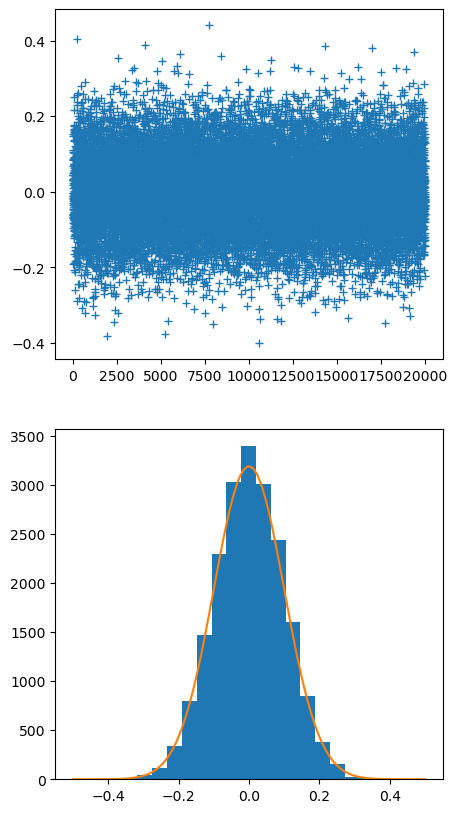

In [3]:
sigma=0.1
x,y=gauss_random(sigma,10000)

# Plot
fig = plt.figure(figsize=(5,10))
ax0 = fig.add_subplot(2, 1, 1)
ax1 = fig.add_subplot(2, 1, 2)

rands=np.concatenate((x,y))
ax0.plot(rands,'+')
ax1.hist(rands,bins=20)

# Gaussian distribution
x=np.linspace(-0.5,0.5,100)
gauss=800*(1/np.sqrt(2*np.pi*sigma**2))*np.exp(-x**2/(2*sigma**2))
ax1.plot(x,gauss)

plt.savefig('gauss_random.pdf',bbox_inches='tight')
plt.show()

# Rutherford scattering

In [9]:
# Parameters
Z=79
e=1.60218e-19 # electron charge in C
E=7.7e6 * e # Kinetic energy
epsilon0=8.854e-12 # C/Jm
a0=5.292e-11 # Bohr radius in m
sigma=a0/100
N=int(1e6)

x,y=gauss_random(sigma,N)
b=np.sqrt(x**2+y**2) # get the radius

backScatter=(Z*e**2)/(2*np.pi*epsilon0*E)

nBack=len(np.where(b < backScatter)[0])

print(nBack,'Particles reflected out of',N)


1562 Particles reflected out of 1000000


## Exact solution of Rutherford scattering

In [10]:
nBack=(1-np.exp(-(Z**2*e**4)/(8.*np.pi**2*epsilon0**2*sigma**2*E**2)))*N

print(int(nBack),'Particles reflected out of',N)

1557 Particles reflected out of 1000000
